# Data Wrangling

In [77]:
#Import libraries
import pandas as pd
pd.set_option('display.max_columns', None) # Display all the columns
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)

In [31]:
#Import data
path = '../../../data/'
df = pd.read_csv(str(path)+"flights_sample_10.csv",low_memory=False)

In [32]:
df_test = df[:10].copy()

In [33]:
print(df.shape)
print(df.dtypes)

(1592444, 43)
Unnamed: 0               int64
fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled                int64
cancellation_code       object
diverted                 int64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               fl

In [34]:
df.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,0,2018-05-29,DL,DL,DL,551,DL,N945DL,551,10397,ATL,"Atlanta, GA",11995,GSO,"Greensboro/High Point, NC",2331,2.0,31.0,9.0,11.0,52.0,12.0,39,104.0,25.0,0,NaN,0,N,68.0,62.0,41.0,1,306,0.0,0.0,0.0,0.0,25.0,NaN,NaN,NaN,NaN
1,1,2018-05-29,DL,DL,DL,565,DL,N918DH,565,14100,PHL,"Philadelphia, PA",11433,DTW,"Detroit, MI",600,554.0,-6.0,12.0,606.0,715.0,8.0,737,723.0,-14.0,0,NaN,0,N,97.0,89.0,69.0,1,453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2018-05-29,DL,DL,DL,658,DL,N990DL,658,10397,ATL,"Atlanta, GA",12448,JAN,"Jackson/Vicksburg, MS",1950,2016.0,26.0,33.0,2049.0,2046.0,7.0,2010,2053.0,43.0,0,NaN,0,N,80.0,97.0,57.0,1,341,18.0,0.0,17.0,0.0,8.0,NaN,NaN,NaN,NaN
3,3,2018-05-29,DL,DL,DL,678,DL,N365NB,678,11996,GSP,"Greer, SC",11433,DTW,"Detroit, MI",600,555.0,-5.0,11.0,606.0,722.0,7.0,750,729.0,-21.0,0,NaN,0,N,110.0,94.0,76.0,1,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2018-05-29,DL,DL,DL,724,DL,N819DN,724,14869,SLC,"Salt Lake City, UT",10849,BZN,"Bozeman, MT",2220,2301.0,41.0,10.0,2311.0,4.0,5.0,2333,9.0,36.0,0,NaN,0,N,73.0,68.0,53.0,1,347,36.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [35]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
no_name,1592444,1.000000
total_add_gtime,1581485,0.993118
first_dep_time,1581484,0.993117
longest_add_gtime,1581484,0.993117
cancellation_code,1565457,0.983053
late_aircraft_delay,1291631,0.811100
security_delay,1291631,0.811100
nas_delay,1291631,0.811100
weather_delay,1291631,0.811100
carrier_delay,1291631,0.811100


In [62]:
df[df['arr_delay'].isnull()]

,Unnamed: 0,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,tail_num,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,origin_state,dest_state
19,19,2018-05-29,DL,890,N910AT,BDL,MSP,1656,1947.0,171.0,16.0,2003.0,13.0,4.0,1855,17.0,NaN,0,NaN,1,N,179.0,NaN,NaN,1,1050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CT,MN
72,72,2018-05-29,DL,1360,N851DN,ATL,BHM,1235,1233.0,-2.0,9.0,1242.0,1714.0,4.0,1225,1718.0,NaN,0,NaN,1,N,50.0,NaN,NaN,1,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GA,AL
99,99,2018-05-29,DL,1596,N837DN,MSP,LGA,1958,2107.0,69.0,24.0,2131.0,728.0,7.0,2344,735.0,NaN,0,NaN,1,N,166.0,NaN,NaN,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MN,NY
529,529,2018-05-29,WN,702,N283WN,LAX,OAK,2250,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,1,A,0,N,75.0,NaN,NaN,1,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,CA
567,567,2018-05-29,WN,1960,N554WN,MDW,MSP,1605,1924.0,199.0,10.0,1934.0,NaN,NaN,1730,NaN,NaN,0,NaN,1,N,85.0,NaN,NaN,1,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,MN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591544,1591544,2018-05-28,WN,1903,N726SW,SAT,DEN,1415,1632.0,137.0,10.0,1642.0,2011.0,5.0,1530,2016.0,NaN,0,NaN,1,N,135.0,NaN,NaN,1,794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,CO
1591562,1591562,2018-05-28,WN,823,N569WN,SLC,DEN,1525,NaN,NaN,NaN,NaN,NaN,NaN,1650,NaN,NaN,1,B,0,N,85.0,NaN,NaN,1,391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UT,CO
1591685,1591685,2018-05-28,DL,43,N318NB,JFK,MSP,1600,1553.0,-7.0,22.0,1615.0,2008.0,3.0,1820,2011.0,NaN,0,NaN,1,N,200.0,NaN,NaN,1,1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,MN
1591869,1591869,2018-05-28,DL,2169,N698DL,LAS,ATL,926,924.0,-2.0,12.0,936.0,2115.0,20.0,1615,2135.0,NaN,0,NaN,1,N,229.0,NaN,NaN,1,1747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV,GA


# Add Origin and destination State columns

In [43]:
df['origin_state'] = df['origin_city_name'].str[-2:]
df['dest_state'] = df['dest_city_name'].str[-2:]

In [44]:
#df

In [45]:
# for s in df.origin_state.value_counts().index.sort_values():
#     print(s)


In [46]:
(len(df.dest_state.value_counts()))

53

# Convert to date time

In [60]:
df['fl_date'] = pd.to_datetime(df['fl_date'], format='%Y-%m-%d')
#df['crs_dep_time'] = pd.to_datetime(df['crs_dep_time'], format='%H%M')

# Fill missing values

In [61]:
df["tail_num"] = df["tail_num"].fillna('NA')

# Drop useless columns

In [53]:
#df = df.drop(['no_name','branded_code_share','mkt_carrier','op_unique_carrier','op_carrier_fl_num','origin_airport_id','origin_city_name','dest_airport_id','dest_city_name'],axis=1)
df.head(10)

,Unnamed: 0,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,tail_num,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,origin_state,dest_state
0,0,2018-05-29,DL,551,N945DL,ATL,GSO,2331,2.0,31.0,9.0,11.0,52.0,12.0,39,104.0,25.0,0,NaN,0,N,68.0,62.0,41.0,1,306,0.0,0.0,0.0,0.0,25.0,NaN,NaN,NaN,GA,NC
1,1,2018-05-29,DL,565,N918DH,PHL,DTW,600,554.0,-6.0,12.0,606.0,715.0,8.0,737,723.0,-14.0,0,NaN,0,N,97.0,89.0,69.0,1,453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,MI
2,2,2018-05-29,DL,658,N990DL,ATL,JAN,1950,2016.0,26.0,33.0,2049.0,2046.0,7.0,2010,2053.0,43.0,0,NaN,0,N,80.0,97.0,57.0,1,341,18.0,0.0,17.0,0.0,8.0,NaN,NaN,NaN,GA,MS
3,3,2018-05-29,DL,678,N365NB,GSP,DTW,600,555.0,-5.0,11.0,606.0,722.0,7.0,750,729.0,-21.0,0,NaN,0,N,110.0,94.0,76.0,1,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC,MI
4,4,2018-05-29,DL,724,N819DN,SLC,BZN,2220,2301.0,41.0,10.0,2311.0,4.0,5.0,2333,9.0,36.0,0,NaN,0,N,73.0,68.0,53.0,1,347,36.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,UT,MT
5,5,2018-05-29,DL,740,N872DN,SEA,SLC,1825,1820.0,-5.0,11.0,1831.0,2102.0,5.0,2119,2107.0,-12.0,0,NaN,0,N,114.0,107.0,91.0,1,689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WA,UT
6,6,2018-05-29,DL,746,N891AT,LEX,ATL,710,708.0,-2.0,12.0,720.0,823.0,5.0,834,828.0,-6.0,0,NaN,0,N,84.0,80.0,63.0,1,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,GA
7,7,2018-05-29,DL,753,N322NB,LAX,MCI,1740,1756.0,16.0,12.0,1808.0,2306.0,5.0,2304,2311.0,7.0,0,NaN,0,N,204.0,195.0,178.0,1,1363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,MO
8,8,2018-05-29,DL,755,N948DL,ATL,VPS,2245,2241.0,-4.0,17.0,2258.0,2242.0,4.0,2256,2246.0,-10.0,0,NaN,0,N,71.0,65.0,44.0,1,250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GA,FL
9,9,2018-05-29,DL,762,N929AT,ATL,MDW,1625,1654.0,29.0,36.0,1730.0,1750.0,3.0,1721,1753.0,32.0,0,NaN,0,N,116.0,119.0,80.0,1,591,6.0,0.0,3.0,0.0,23.0,NaN,NaN,NaN,GA,IL


# Question 1
- remove cancelled flights
- remove nan from dep_delay
- Histogram dep_delays and get mean
- Think about outliers

- remove cancelled flights
- remove nan from arr_delay
- Histogram arr_delays and get mean
- Think about outliers



In [146]:
# Remove canceled flights and dep_delay null values
df1a = df[(df.cancelled == 0) & df.dep_delay.notnull()]

In [147]:
x = df1a.dep_delay # all the values
xwo = x[x.between(x.quantile(.10), x.quantile(.90))] # without outliers

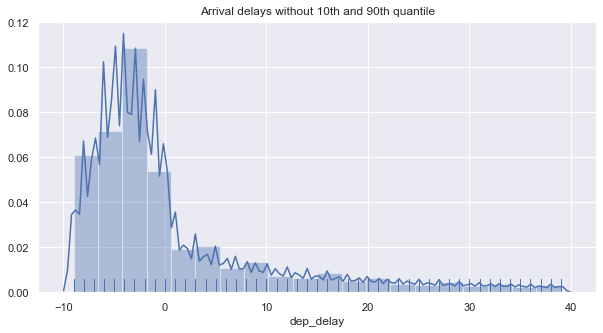

In [148]:
plt.figure(figsize=(10,5))
sns.distplot(xwo, bins=20, rug=True).set_title('Arrival delays without 10th and 90th quantile');

In [149]:
print(f'Departure delay median : {xwo.median()}')
print(f'Departure delay mean : {xwo.mean()}')

Departure delay median : -2.0
Departure delay mean : 0.7856154846253857


In [150]:
# Remove canceled flights and arr_delay with null values
df1b = df[(df.cancelled == 0) & df.arr_delay.notnull()]

In [151]:
x = df1b.arr_delay # all the values
xwo = x[x.between(x.quantile(.10), x.quantile(.90))] # without outliers

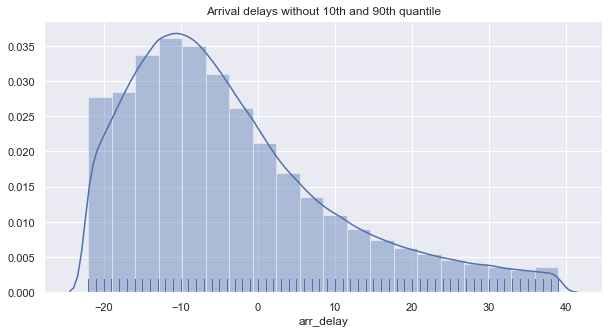

In [152]:
plt.figure(figsize=(10,5))
sns.distplot(xwo, bins=20, rug=True).set_title('Arrival delays without 10th and 90th quantile');

In [153]:
print(f'Arrival delay median : {xwo.median()}')
print(f'Arrival delay mean : {xwo.mean()}')

Arrival delay median : -6.0
Arrival delay mean : -3.2448565713430817
